In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

train = pd.read_csv("/kaggle/input/playground-series-s3e16/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s3e16/test.csv")

In [3]:
train.head(10).style

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.525000,1.175000,0.375000,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.100000,0.825000,0.275000,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.387500,1.112500,0.375000,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.700000,1.412500,0.500000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.250000,1.012500,0.337500,23.289114,11.977664,4.507570,5.953395,8
5,5,M,1.500000,1.175000,0.412500,28.845616,13.409313,6.789705,7.937860,10
6,6,M,1.575000,1.137500,0.350000,30.022120,11.935140,7.342521,8.646598,11
7,7,I,1.312500,1.025000,0.350000,18.299602,8.249704,3.898056,5.669900,11
8,8,F,1.600000,1.287500,0.437500,38.824640,16.967176,7.413394,10.772810,12
9,9,M,1.025000,0.762500,0.262500,10.305043,4.493396,2.126212,2.976698,11


In [4]:
train.shape

(74051, 10)

In [5]:
test.shape

(49368, 9)

In [6]:
train.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
id,74051.000000,37025.000000,21376.826729,0.000000,18512.500000,37025.000000,55537.500000,74050.000000
Length,74051.000000,1.317460,0.287757,0.187500,1.150000,1.375000,1.537500,2.012815
Diameter,74051.000000,1.024496,0.237396,0.137500,0.887500,1.075000,1.200000,1.612500
Height,74051.000000,0.348089,0.092034,0.000000,0.300000,0.362500,0.412500,2.825000
Weight,74051.000000,23.385217,12.648153,0.056699,13.437663,23.799405,32.162508,80.101512
Shucked Weight,74051.000000,10.104270,5.618025,0.028349,5.712424,9.908150,14.033003,42.184056
Viscera Weight,74051.000000,5.058386,2.792729,0.042524,2.863300,4.989512,6.988152,21.545620
Shell Weight,74051.000000,6.723870,3.584372,0.042524,3.968930,6.931453,9.071840,28.491248
Age,74051.000000,9.967806,3.175189,1.000000,8.000000,10.000000,11.000000,29.000000


In [7]:
test.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
id,49368.000000,98734.500000,14251.458382,74051.000000,86392.750000,98734.500000,111076.250000,123418.000000
Length,49368.000000,1.319795,0.286950,0.187500,1.162500,1.387500,1.537500,2.037500
Diameter,49368.000000,1.026357,0.236593,0.137500,0.887500,1.075000,1.200000,1.625000
Height,49368.000000,0.348693,0.092259,0.000000,0.300000,0.362500,0.412500,2.825000
Weight,49368.000000,23.464627,12.641703,0.056699,13.536886,23.813580,32.290081,80.101512
Shucked Weight,49368.000000,10.130220,5.611779,0.028349,5.740774,9.979024,14.047177,42.184056
Viscera Weight,49368.000000,5.072615,2.791563,0.014175,2.877474,4.989512,7.016501,21.545620
Shell Weight,49368.000000,6.745876,3.575650,0.042524,3.968930,6.945627,9.171063,28.491248


In [8]:
train.isnull().mean()*100

id                0.0
Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Weight            0.0
Shucked Weight    0.0
Viscera Weight    0.0
Shell Weight      0.0
Age               0.0
dtype: float64

In [9]:
test.isnull().mean()*100

id                0.0
Sex               0.0
Length            0.0
Diameter          0.0
Height            0.0
Weight            0.0
Shucked Weight    0.0
Viscera Weight    0.0
Shell Weight      0.0
dtype: float64

/tmp/ipykernel_20/1454998939.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=train.corr(),annot=True,cbar=False)


<Axes: >

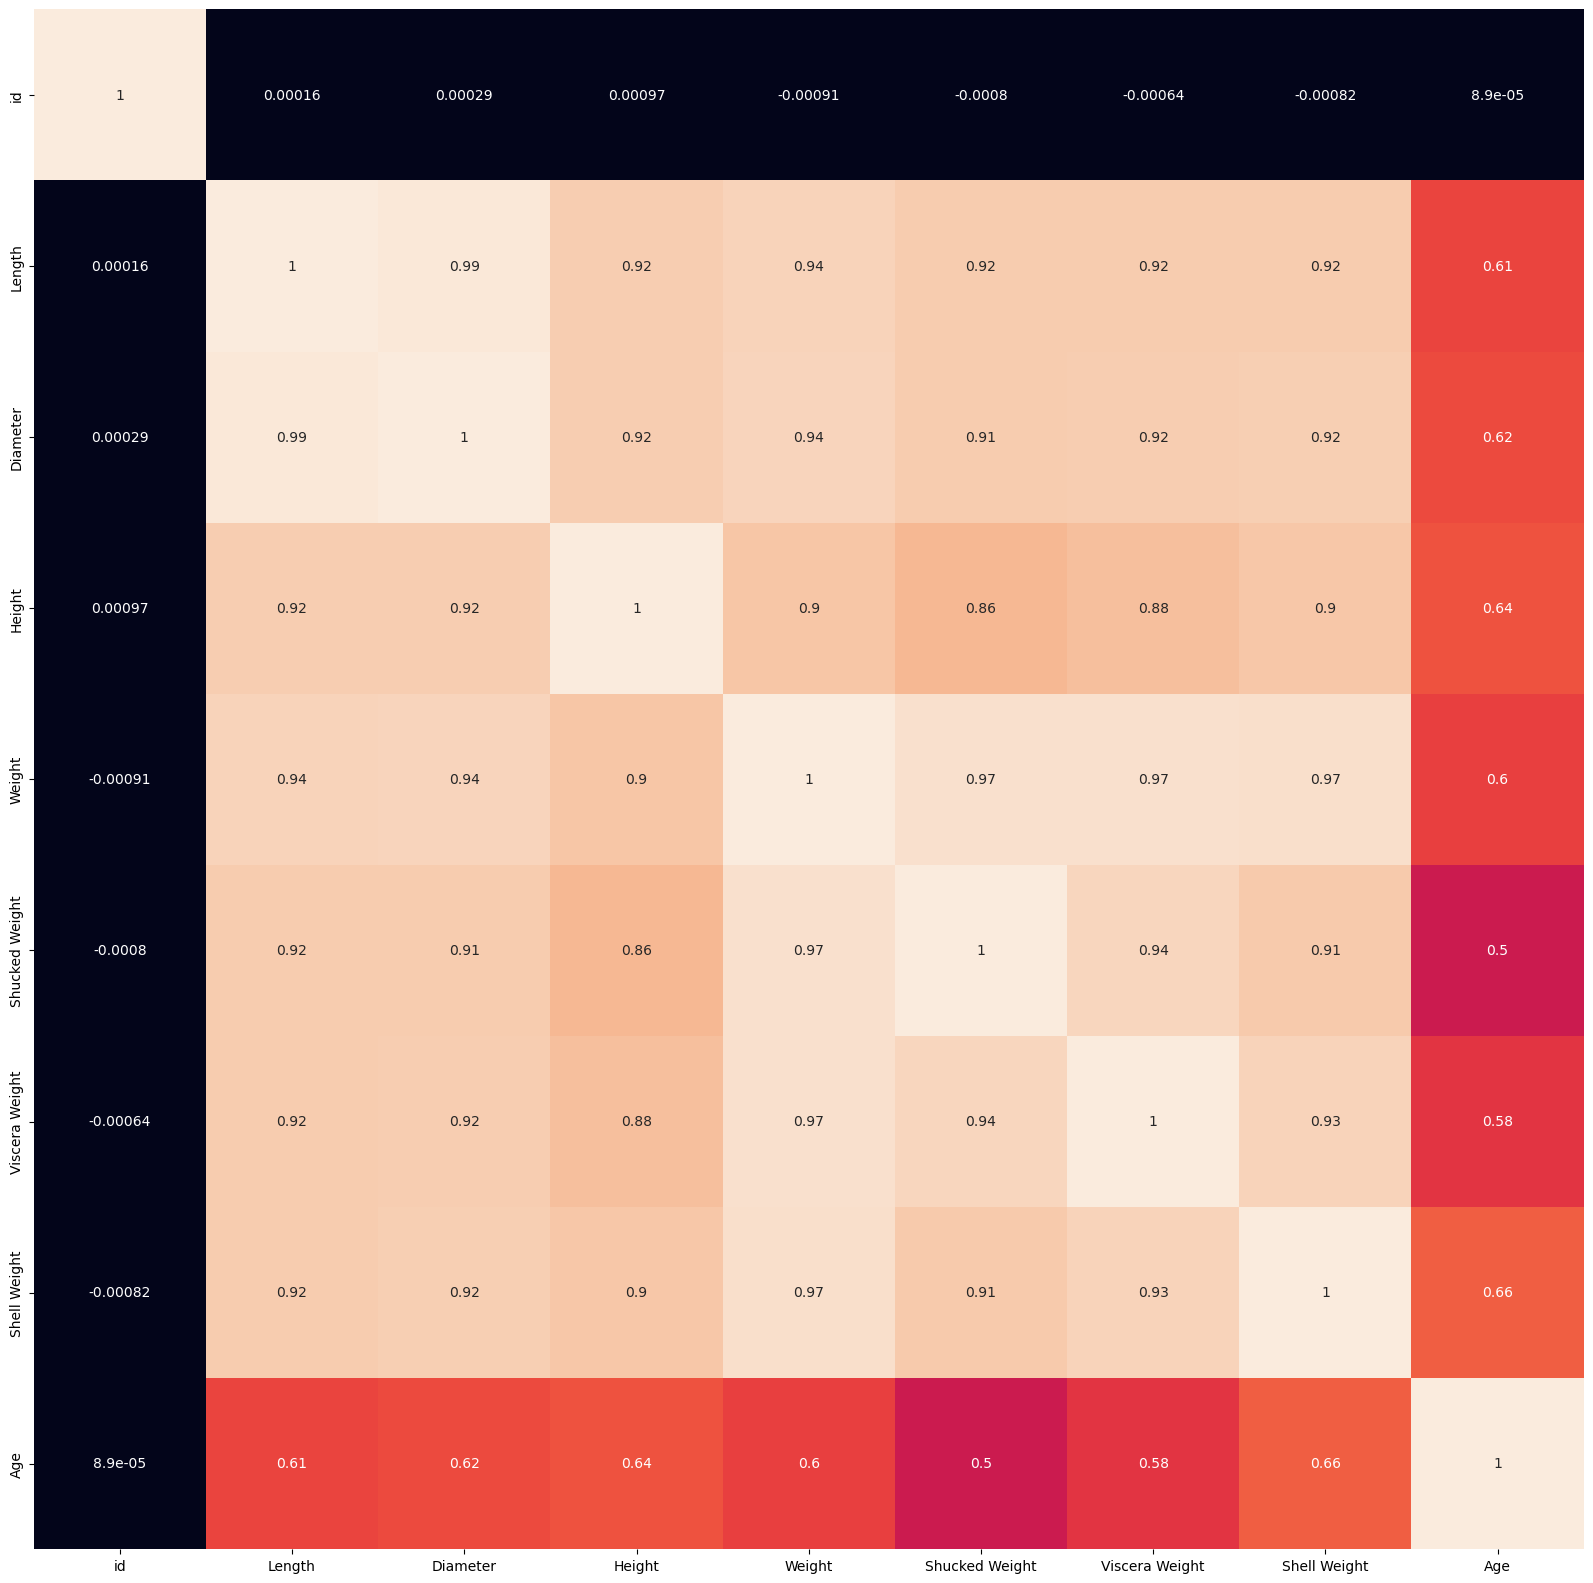

In [10]:
plt.figure(figsize=(20,20))
sns.heatmap(data=train.corr(),annot=True,cbar=False)

In [11]:
train['Sex'].unique()

array(['I', 'M', 'F'], dtype=object)

In [12]:
train['Sex'].value_counts()

M    27084
I    23957
F    23010
Name: Sex, dtype: int64

In [13]:
cols = train.columns.to_list()
cols.remove('id')
cols

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Weight',
 'Shucked Weight',
 'Viscera Weight',
 'Shell Weight',
 'Age']

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Shucked Weight'}>],
       [<Axes: title={'center': 'Viscera Weight'}>,
        <Axes: title={'center': 'Shell Weight'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

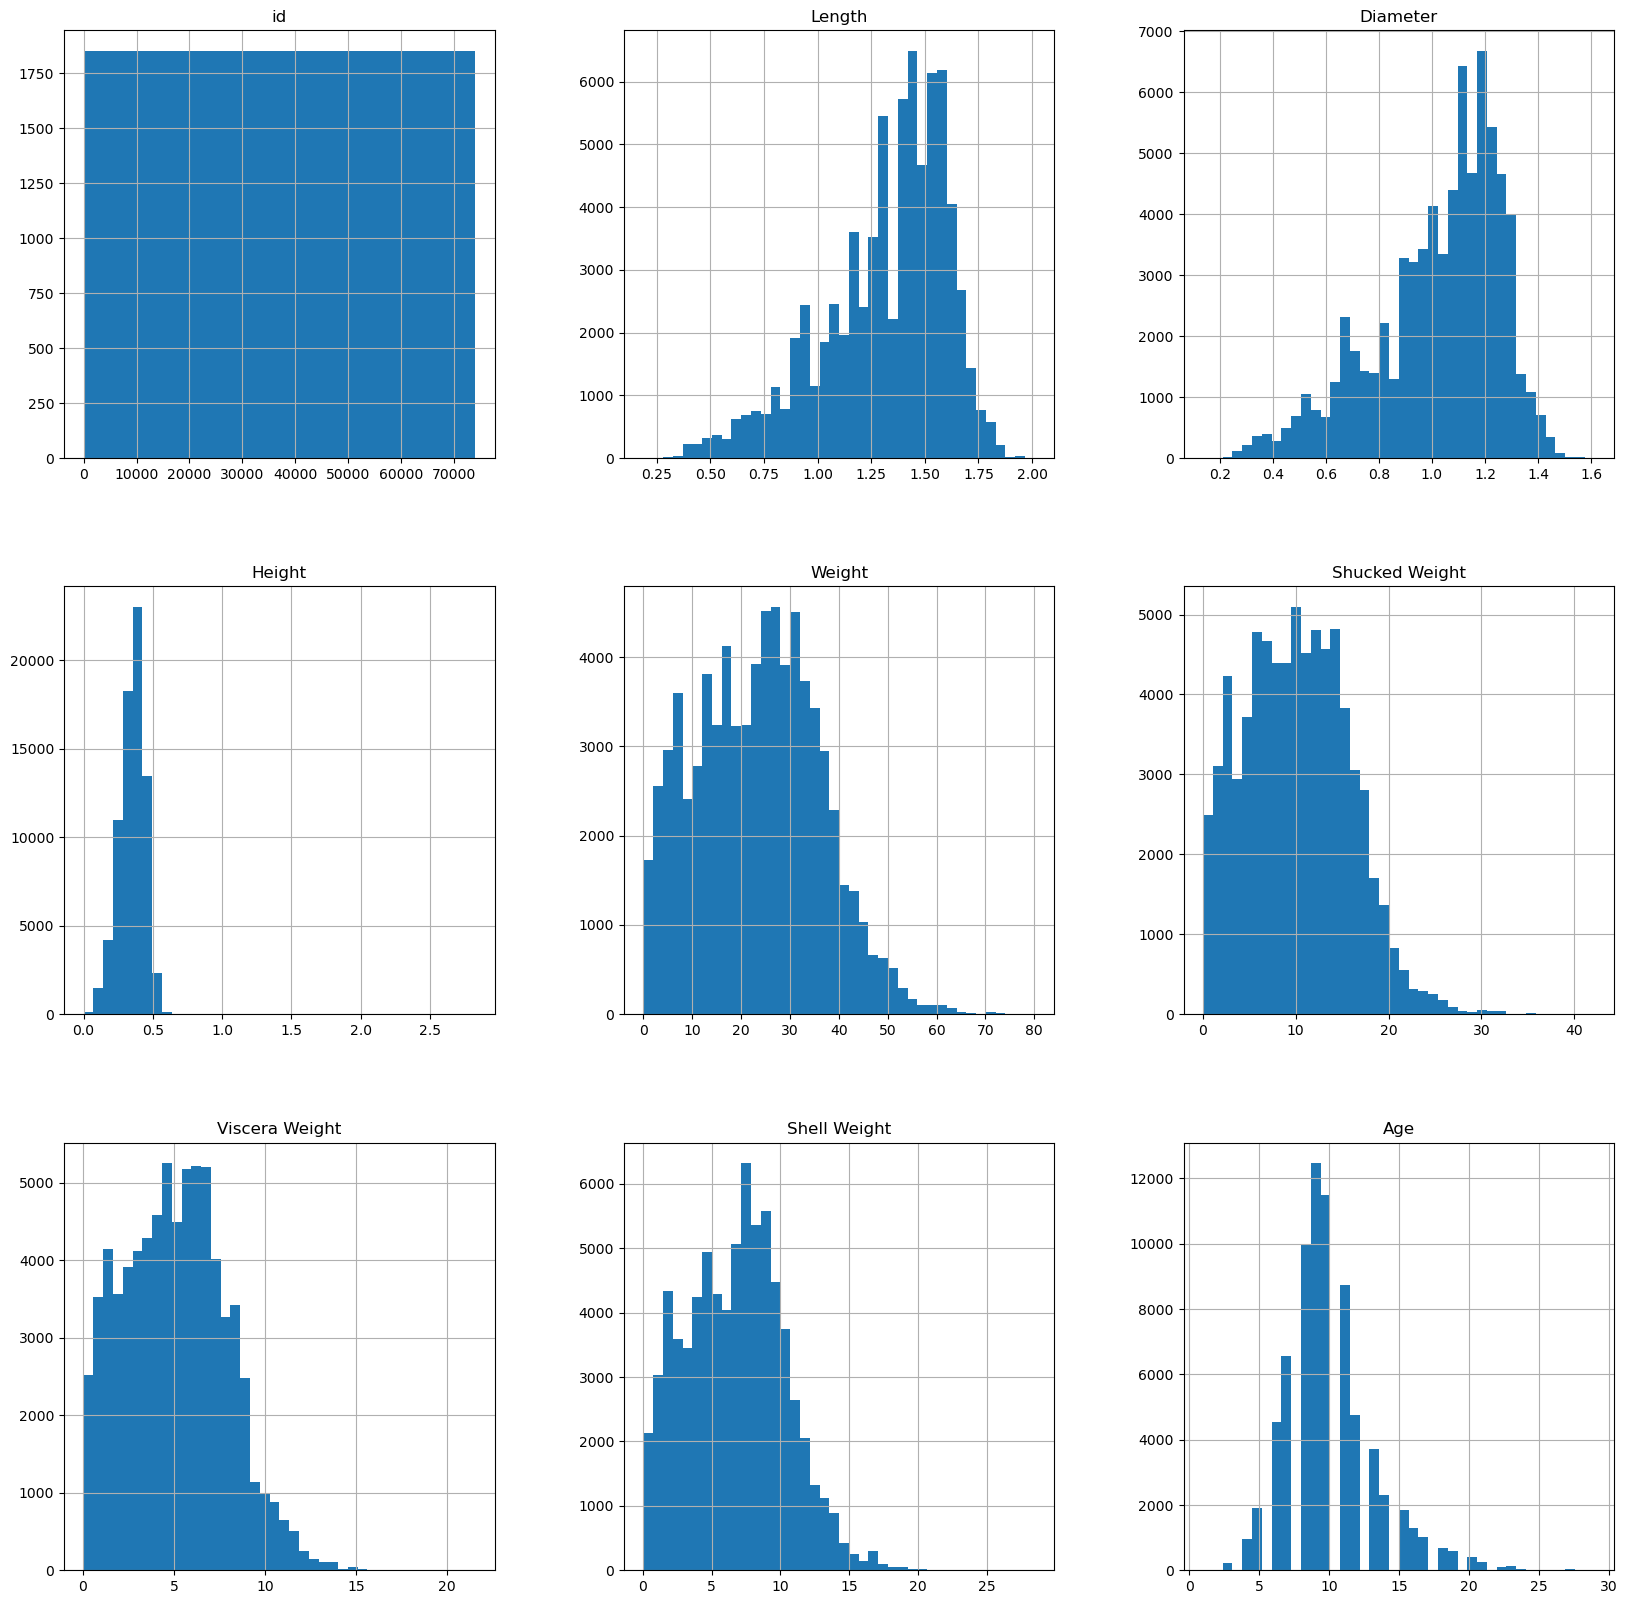

In [14]:
train.hist(figsize=(20,20),bins=40)

In [15]:
cols = train.columns
cols = cols.to_list()
print(cols)

['id', 'Sex', 'Length', 'Diameter', 'Height', 'Weight', 'Shucked Weight', 'Viscera Weight', 'Shell Weight', 'Age']


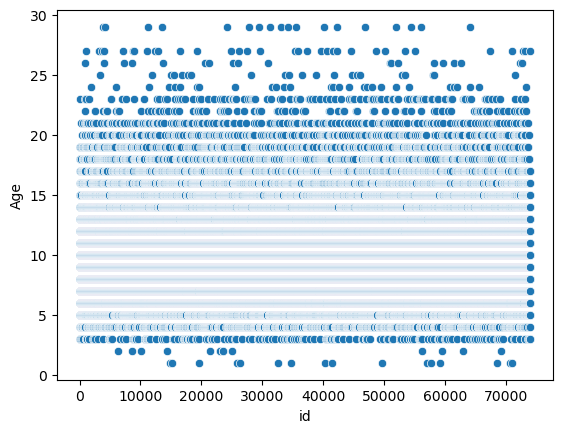

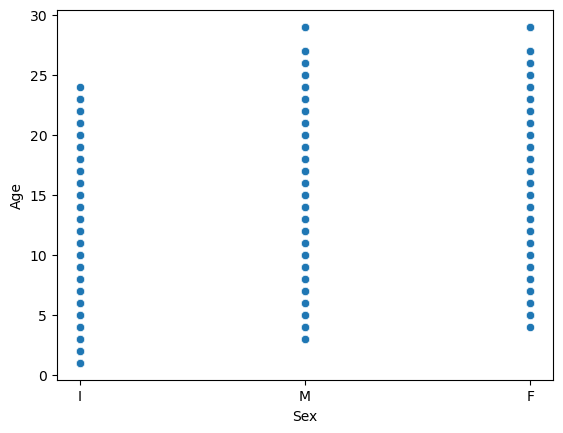

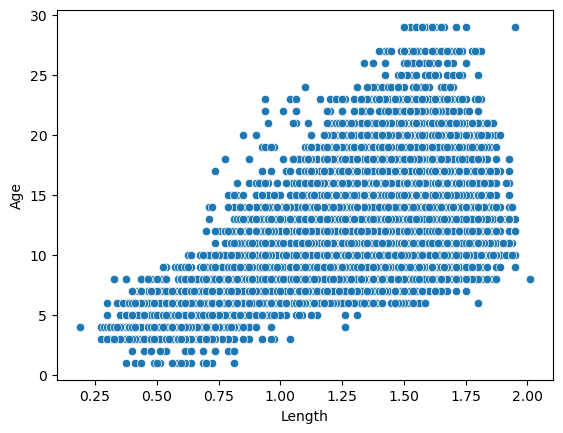

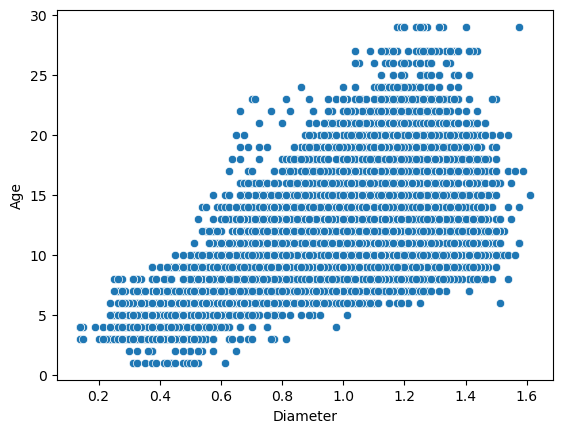

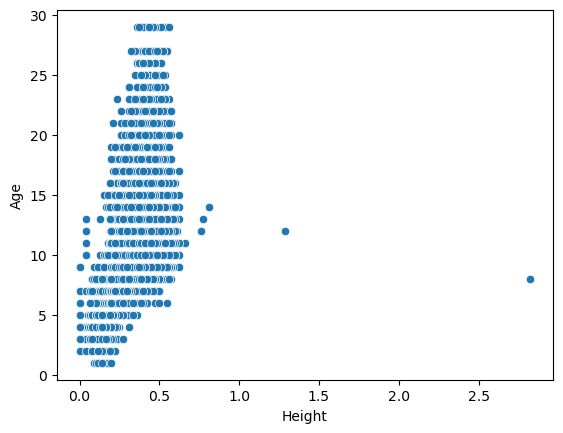

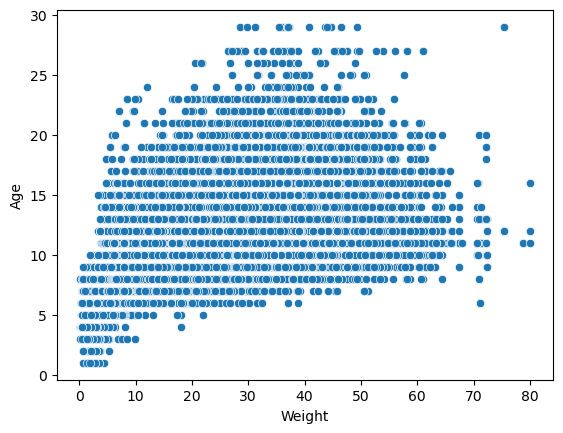

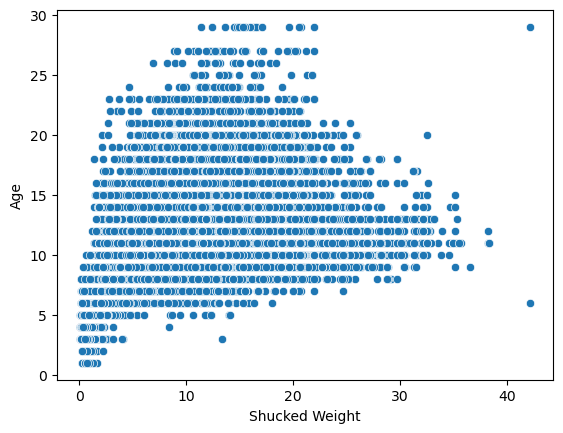

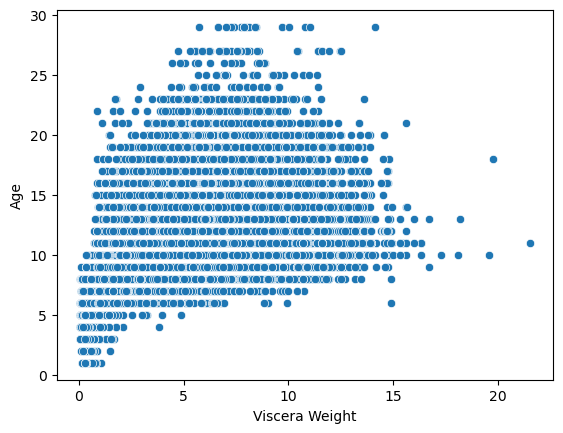

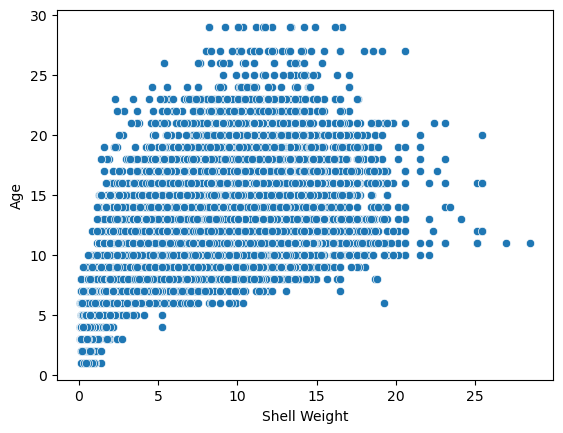

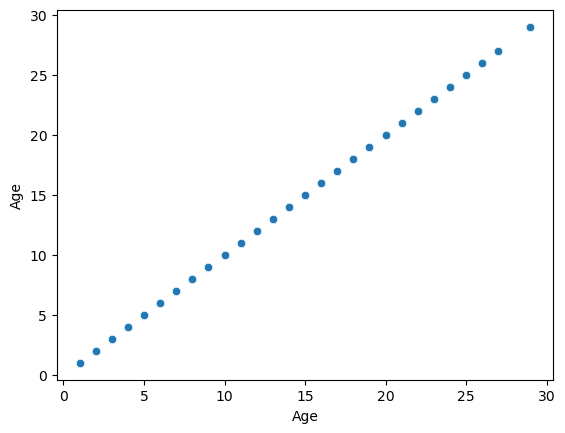

In [16]:
for i in cols:
    sns.scatterplot(data=train,x=i,y='Age')
    plt.show()

In [17]:
correlations = train.corrwith(train['Age'])
correlations = abs(correlations)
correlations

/tmp/ipykernel_20/1721525548.py:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train.corrwith(train['Age'])


id                0.000089
Length            0.612843
Diameter          0.621256
Height            0.638067
Weight            0.601195
Shucked Weight    0.503320
Viscera Weight    0.576808
Shell Weight      0.663473
Age               1.000000
dtype: float64

/tmp/ipykernel_20/2641269692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train["Age"], color = "black")


<Axes: xlabel='Age', ylabel='Density'>

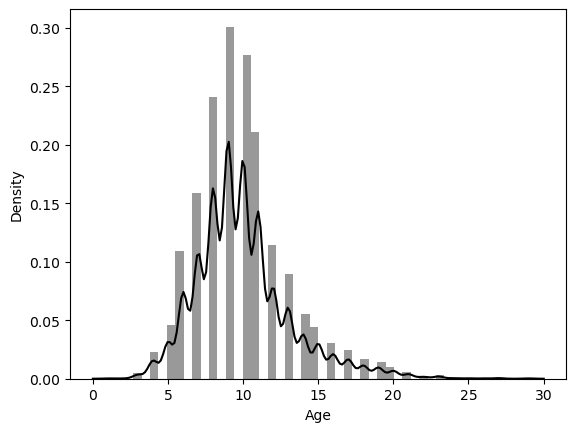

In [18]:
sns.distplot(train["Age"], color = "black")

In [19]:
cols.remove('id')
cols.remove('Age')
cols

['Sex',
 'Length',
 'Diameter',
 'Height',
 'Weight',
 'Shucked Weight',
 'Viscera Weight',
 'Shell Weight']

In [20]:
cols.remove('Sex')

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train[cols] = scaler.fit_transform(train[cols])
test[cols] = scaler.transform(test[cols])

In [22]:
train

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,0.732750,0.703390,0.132743,0.361254,0.301278,0.307185,0.291978,9
1,1,I,0.499914,0.466102,0.097345,0.129449,0.106590,0.106131,0.118087,8
2,2,M,0.657421,0.661017,0.132743,0.308837,0.268325,0.256427,0.232686,9
3,3,F,0.828624,0.864407,0.176991,0.632194,0.482179,0.509197,0.525660,11
4,4,I,0.582091,0.593220,0.119469,0.290243,0.283457,0.207647,0.207773,8
...,...,...,...,...,...,...,...,...,...,...
74046,74046,F,0.808080,0.762712,0.154867,0.632194,0.489913,0.479895,0.431988,10
74047,74047,I,0.486218,0.491525,0.097345,0.129803,0.101883,0.104812,0.123069,6
74048,74048,F,0.712206,0.720339,0.146018,0.367629,0.291190,0.348715,0.282511,10
74049,74049,I,0.561547,0.559322,0.110619,0.208783,0.212172,0.133817,0.148979,8


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Shucked Weight'}>],
       [<Axes: title={'center': 'Viscera Weight'}>,
        <Axes: title={'center': 'Shell Weight'}>,
        <Axes: title={'center': 'Age'}>]], dtype=object)

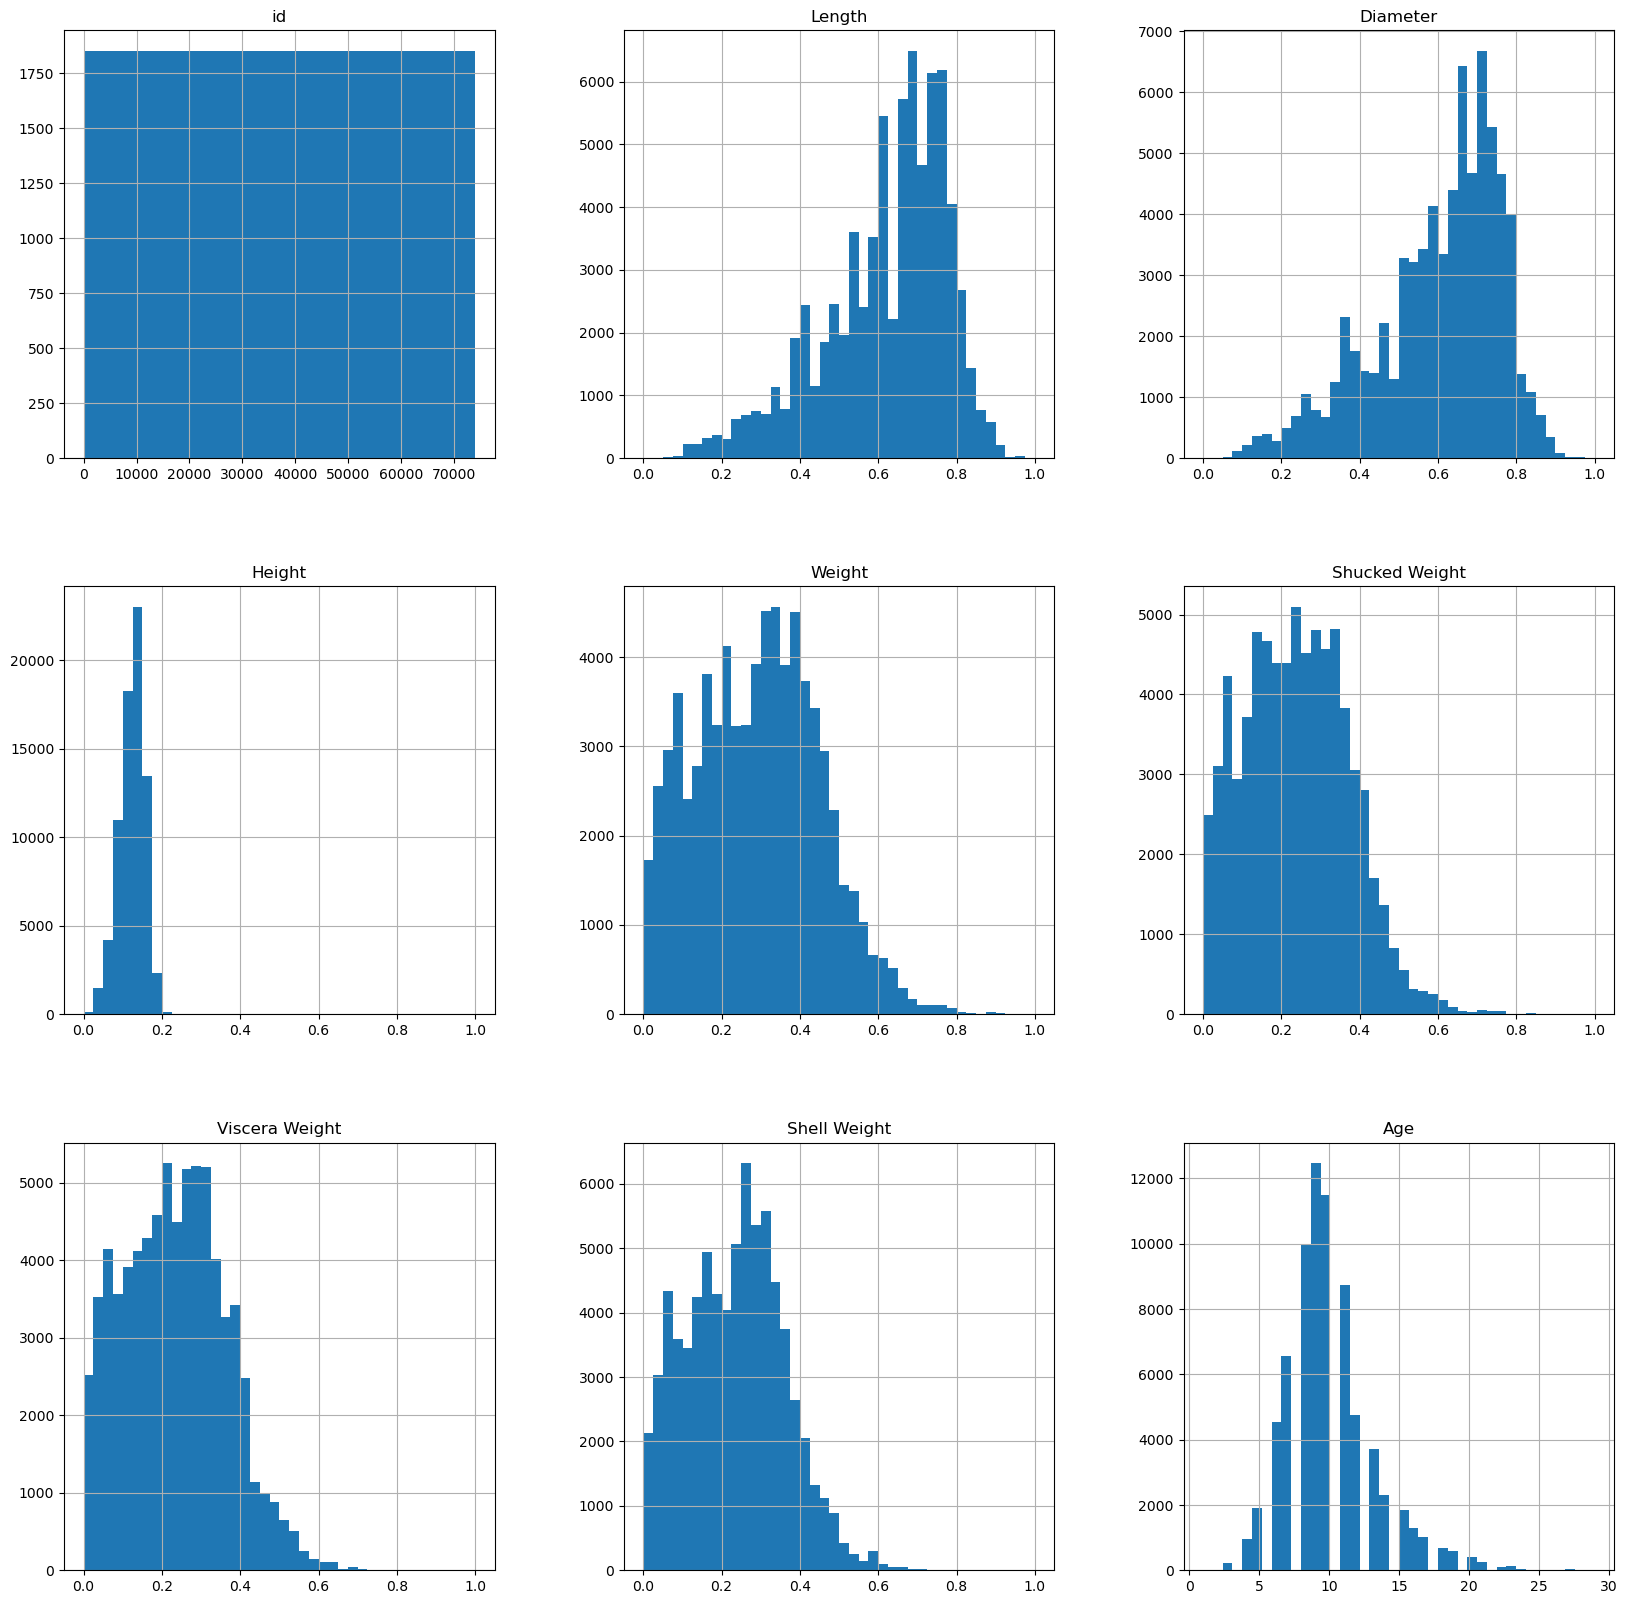

In [23]:
train.hist(figsize=(20,20),bins=40)

In [24]:
train = pd.get_dummies(train, columns=['Sex'])
test = pd.get_dummies(test, columns=['Sex'])

In [25]:
train

,id,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age,Sex_F,Sex_I,Sex_M
0,0,0.732750,0.703390,0.132743,0.361254,0.301278,0.307185,0.291978,9,0,1,0
1,1,0.499914,0.466102,0.097345,0.129449,0.106590,0.106131,0.118087,8,0,1,0
2,2,0.657421,0.661017,0.132743,0.308837,0.268325,0.256427,0.232686,9,0,0,1
3,3,0.828624,0.864407,0.176991,0.632194,0.482179,0.509197,0.525660,11,1,0,0
4,4,0.582091,0.593220,0.119469,0.290243,0.283457,0.207647,0.207773,8,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
74046,74046,0.808080,0.762712,0.154867,0.632194,0.489913,0.479895,0.431988,10,1,0,0
74047,74047,0.486218,0.491525,0.097345,0.129803,0.101883,0.104812,0.123069,6,0,1,0
74048,74048,0.712206,0.720339,0.146018,0.367629,0.291190,0.348715,0.282511,10,1,0,0
74049,74049,0.561547,0.559322,0.110619,0.208783,0.212172,0.133817,0.148979,8,0,1,0


array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'Length'}>,
        <Axes: title={'center': 'Diameter'}>],
       [<Axes: title={'center': 'Height'}>,
        <Axes: title={'center': 'Weight'}>,
        <Axes: title={'center': 'Shucked Weight'}>],
       [<Axes: title={'center': 'Viscera Weight'}>,
        <Axes: title={'center': 'Shell Weight'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Sex_F'}>,
        <Axes: title={'center': 'Sex_I'}>,
        <Axes: title={'center': 'Sex_M'}>]], dtype=object)

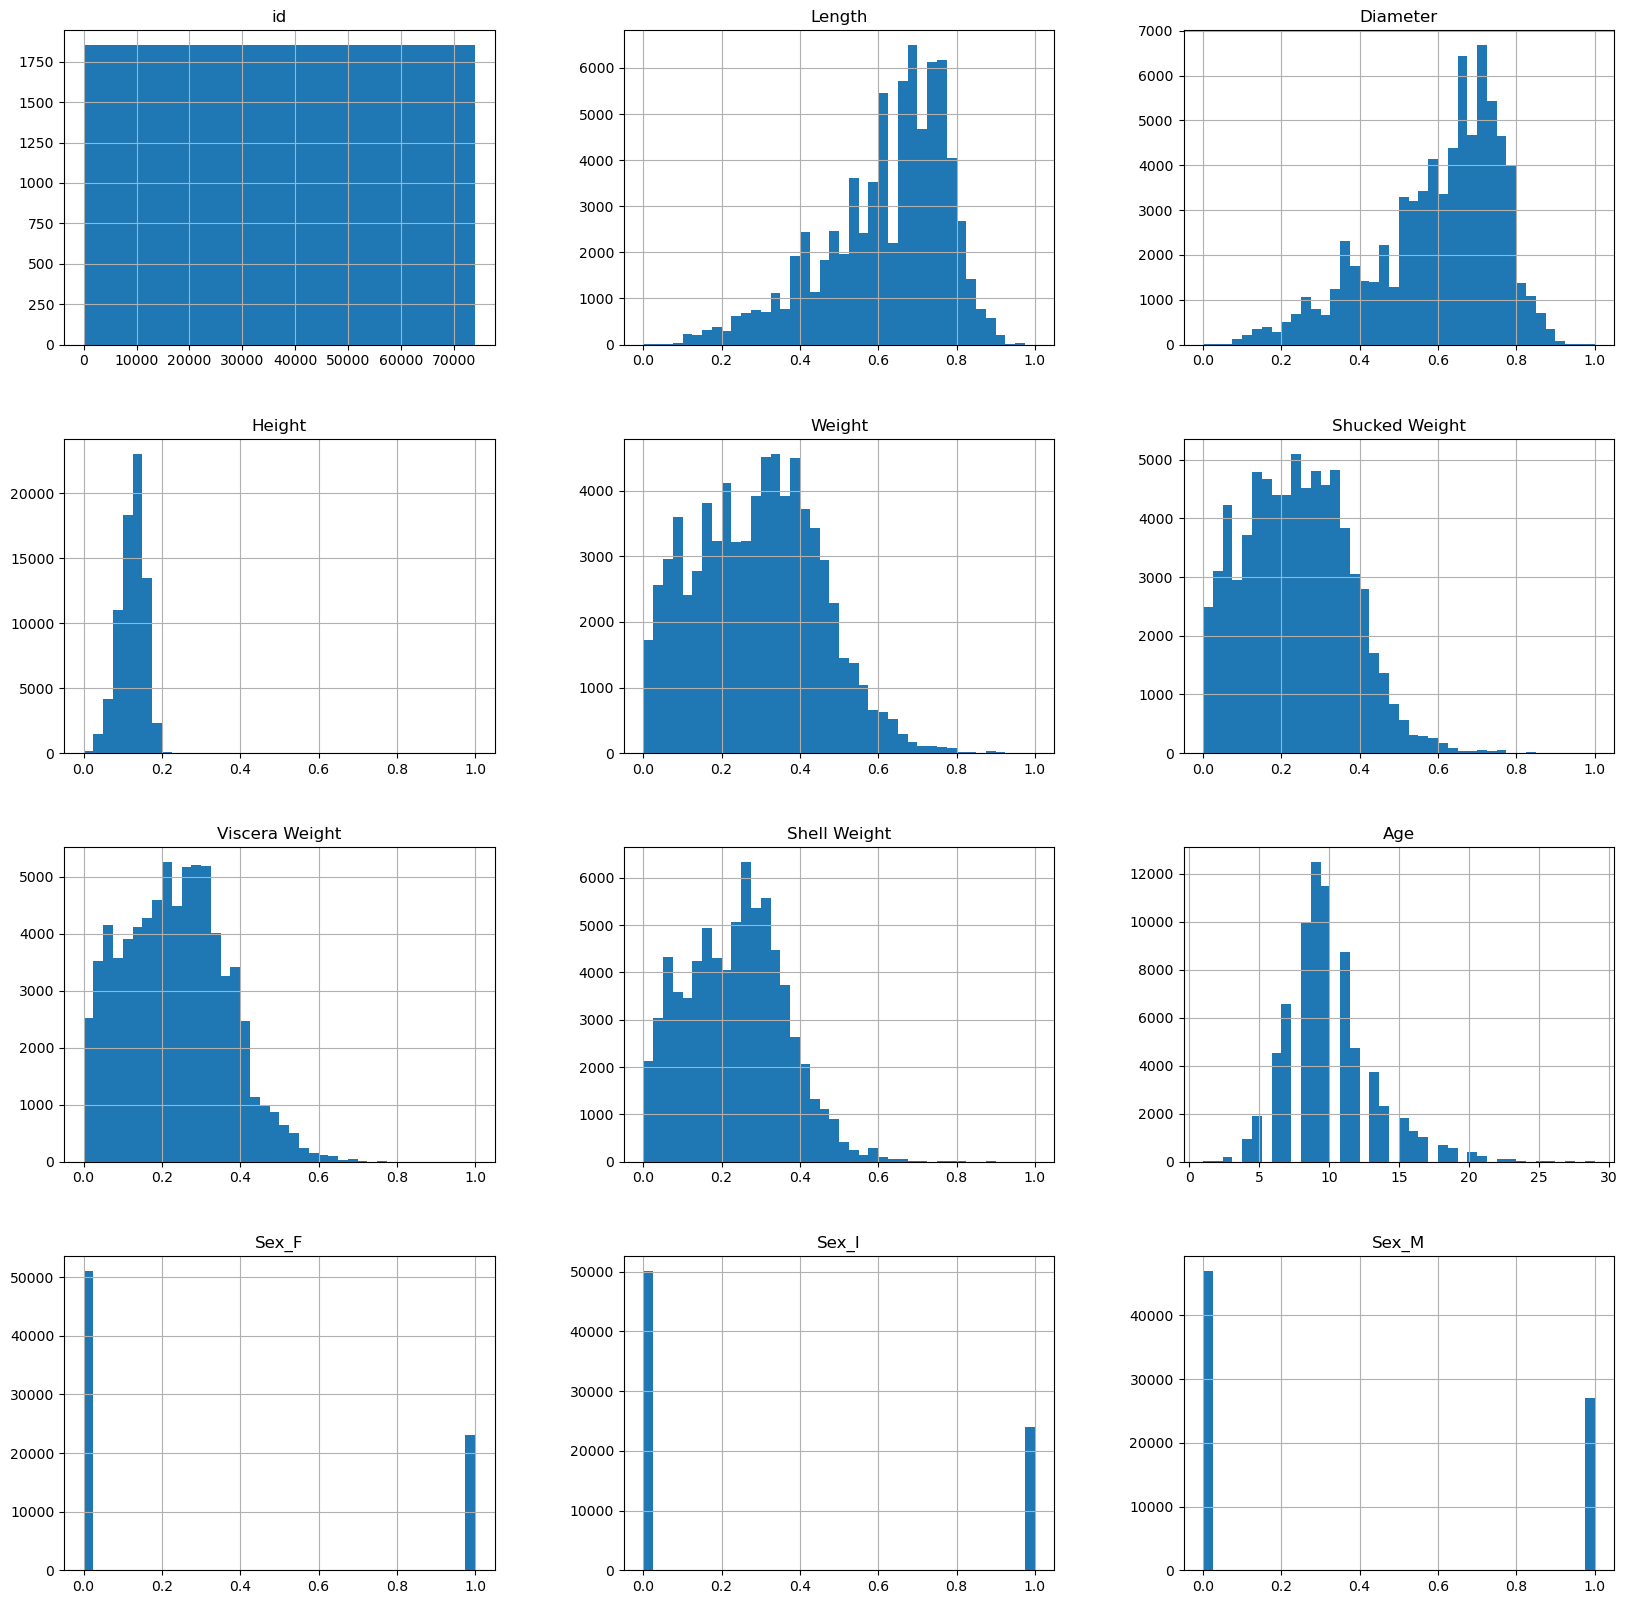

In [26]:
train.hist(figsize=(20,20),bins=40)

In [27]:
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

In [28]:
X = train.drop(["id",'Age'],axis=1)
y = train['Age']
X_train,X_test,y_train,y_test = train_test_split(X ,y , train_size=0.7 , test_size=0.3, random_state=1)

In [29]:
l = []
p = [20,40,50,70,100,120,150,180]
for n in p:
    model = XGBRegressor(n_estimators= n)
    model.fit(X_train,y_train)
    cv_scores = cross_val_score(model,X,y,scoring="neg_mean_squared_error",cv=3)
    test_rmse = np.sqrt(-cv_scores)
    means= test_rmse.mean()
    print(means)
    l.append(means)

2.055514456790253
2.060267243697245
2.0636575234293484
2.072267492349347
2.080116431944838
2.0854364284659135
2.0945466938317323
2.1029468042698674


<Axes: >

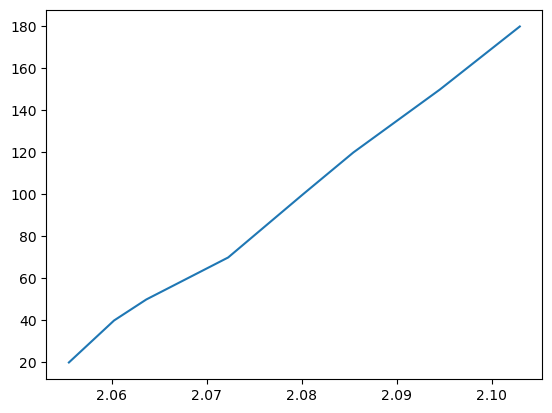

In [30]:
sns.lineplot(x=l, y=p)

In [31]:
l = []
p = [20,40,50,70,100,120,150,180]
for n in p:
    model = GradientBoostingRegressor(n_estimators=n)
    model.fit(X_train,y_train)
    cv_scores = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=3)
    test_rmse = np.sqrt(-cv_scores)
    means= test_rmse.mean()
    l.append(means)
    print(means)

2.1969712704159856
2.109002289096128
2.0946933516324204
2.0771744408104844
2.064516206572204
2.060626182607126
2.056556993699369
2.054366775004335


<Axes: >

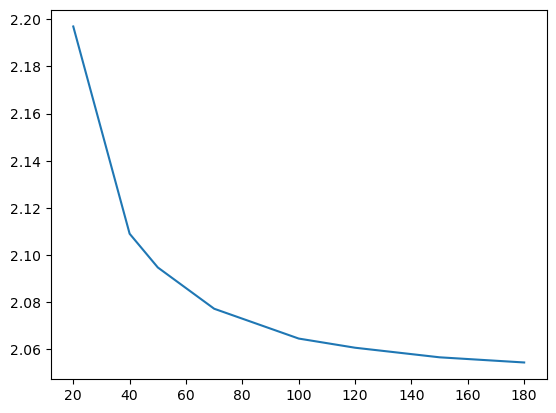

In [32]:
sns.lineplot(x=p, y=l)

In [33]:
l = []
p = [100,200,300,400,500]
lr= [0.01, 0.1, 0.5]
param_grid ={'n_estimators':p,'learning_rate': lr}
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_grid, scoring='neg_mean_squared_error', cv=3)

In [34]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [35]:
best_n_estimators = grid_search.best_params_['n_estimators']
best_learning_rate = grid_search.best_params_['learning_rate']
model = GradientBoostingRegressor(n_estimators=best_n_estimators, learning_rate=best_learning_rate)

In [36]:
model.fit(X_train,y_train)
cv_scores = cross_val_score(model,X,y,scoring='neg_mean_squared_error',cv=3)
test_rmse = np.sqrt(-cv_scores)
means= test_rmse.mean()
l.append(means)
print(means)

2.049584100613636


In [37]:
best_n_estimators

300

In [38]:
best_n_estimators

300

In [39]:
X_train, y_train = train.drop(["id",'Age'], axis=1), train['Age']
X_test = test.drop("id", axis=1)
model = GradientBoostingRegressor(n_estimators=best_n_estimators,learning_rate=best_n_estimators)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/opt/conda/lib/python3.10/site-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb_losses.py:231: RuntimeWarning: overflow encountered in square
  * np.sum(sample_weight * ((y - raw_predictions.ravel()) ** 2))
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb_losses.py:2

In [40]:
predictions_df = pd.DataFrame({'id': test['id'], 'Age': y_pred})
predictions_df.to_csv('predictions.csv', index=False)